<h1>Importing libraries</h1>

In [12]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from dnn_face_detection import detect_face
from sklearn.metrics.pairwise import cosine_similarity
from keras_facenet import FaceNet

<h1>Reading Image</h1>

<p>The test image is also read so that we can find there is aleast one image matching, the test image is also in the dataset </p>

In [34]:
sample_img = cv2.imread("sample_img.jpg")
test_img = cv2.imread("test_img.jpg")

In [3]:
def plot_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

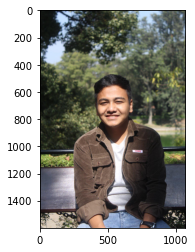

In [36]:
plot_img(sample_img)

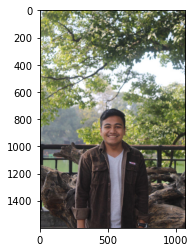

In [37]:
plot_img(test_img)

In [5]:
def face_detection(img):
    faces = detect_face(img)
    print(faces)
    for bounding_box in faces:
        x = int(bounding_box[0])
        y = int(bounding_box[1])
        x2 = int(bounding_box[2])
        y2 = int(bounding_box[3])
        print(x,y,x2,y2)
        crop_face = img[y:y2,x:x2]
        crop_face = cv2.resize(crop_face,(160,160)) #convertion only works in (160,160) so resizing
        return crop_face

[[411.57 554.26 652.6  856.25]]
411 554 652 856
[[455.04 772.79 611.52 985.53]]
455 772 611 985


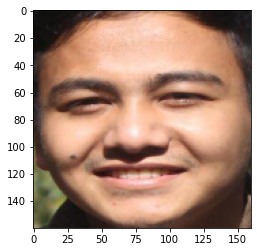

In [38]:
sample_img_face = face_detection(sample_img)
test_img_face = face_detection(test_img)
plot_img(sample_img_face)

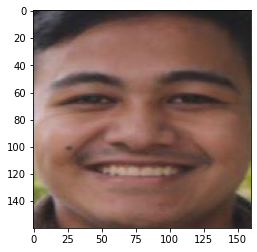

In [39]:
plot_img(test_img_face)

In [7]:
embedder = FaceNet()

2022-11-20 12:52:48.180005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sujen/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-20 12:52:48.180340: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-20 12:52:48.180370: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-11-20 12:52:48.181069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h2>Function to embedded the face image, it return embedded facial image</h2>

In [40]:
def emb(img):
    embedding_img = embedder.embeddings(np.expand_dims(img,axis=0))
    return embedding_img

In [41]:
embedding_sample =  emb(sample_img_face)
emdedding_test = emb(test_img_face)

1/1 [==============================] - 0s 85ms/step


In [42]:
embedding_sample.shape


(1, 512)

<h2>Function to compare the sample with another image</h2>
<p>If the images have 70% or more score, it will return a true value else it will return false</p>

In [13]:
def compare(img1,img2):
    similarity_score = cosine_similarity(img1,img2)
    if similarity_score >= 0.70 :
        return True
    else:
        return False

<h2>for testing</h2>
<p>This was done to see if the imwrite() was working properly</p>

In [48]:
filter_path = "/home/sujen/projects/c2c-ai/assignment-6/dataset/filter"
test_img_name = "test_img.jpg"
saving_path = filter_path + '/'+test_img_name
score = compare(embedding_sample,emdedding_test)
print(score)
print(saving_path)
cv2.imwrite(saving_path,test_img)

True
/home/sujen/projects/c2c-ai/assignment-6/dataset/filter/test_img.jpg


True

<h1>Main loop</h1>
<p> checks the images in dataset and if matches with sample adds to filter folder</p>

In [49]:
valid_image_extensions = [".jpg", ".jpeg", ".png", ".tif", ".tiff"] 

filter_path = "/home/sujen/projects/c2c-ai/assignment-6/dataset/filter"
base_img_path = "/home/sujen/projects/c2c-ai/assignment-6/dataset/images"

for img_name in os.listdir(base_img_path):
    #checking to see if the extension is valid
    filename, file_extension = os.path.splitext(img_name)
    print(filename,file_extension)
    if file_extension in valid_image_extensions:
        #path is created for the reading of the image
        path = base_img_path +'/' +img_name
        #print(path)
        img = cv2.imread(path)
        #plot_img(img)
        try:
            face_img = face_detection(img)
            #plot_img(face_img)
            embedded_img = emb(face_img)
            #if write_var is true the images have more than 70% features match
            write_var = compare(embedding_sample,embedded_img)
            if write_var == True:
                #write_path is created for the writing of the image
                write_path = filter_path + '/' + img_name
                cv2.imwrite(write_path,img)
        except:
            continue




images104 .jpg
[[ 85.11  48.27 174.21 159.48]]
85 48 174 159
1/1 [==============================] - 0s 80ms/step
GettyImages-77731940 .jpg
[[ 447.18  436.8  1505.99 2070.01]]
447 436 1505 2070
1/1 [==============================] - 0s 130ms/step
images5 .jpg
[[190.27  21.09 229.82  81.58]]
190 21 229 81
1/1 [==============================] - 0s 133ms/step
image32 .jpeg
[[224.05  27.56 269.25  91.81]
 [138.38  41.95 171.67  90.87]
 [ 25.24  27.04  70.46  87.53]]
224 27 269 91
1/1 [==============================] - 0s 73ms/step
Oprah-Winfrey-OWN-business-empire-shutterstock_editorial_10223540cg_huge .jpg
[[ 587.33  108.54 1021.82  697.59]]
587 108 1021 697
1/1 [==============================] - 0s 86ms/step
angus-cloud-attends-hbos-euphoria-season-2-photo-call-at-news-photo-1647546537 .jpg
[[2137.93  336.84 2956.4  1398.83]]
2137 336 2956 1398
1/1 [==============================] - 0s 73ms/step
images58 .jpg
[]
images83 .jpg
[[ 90.82  27.72 161.63 119.8 ]]
90 27 161 119
1/1 [============

In [50]:
'''No celebrities looked like me so to see if the code was working i added my own image as test_img.jpg to the dataset and it got added to filter'''

'No celebrities looked like me so to see if the code was working i added my own image as test_img.jpg to the dataset and it got added to filter'